<a href="https://colab.research.google.com/github/cecellhax/analises_covid19/blob/main/covis19_mortes_compara%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de dados dos óbitos causados pela COVID-19 no Brasil, China, Itália, Estados Unidos e Índia**


In [13]:
import pandas as pd

In [15]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

mortes_globais = pd.read_csv(url)

In [16]:
mortes_globais.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2432,2433,2435,2436,2438,2442,2443,2443,2444,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1666,1681,1696,1715,1736,1756,1775,1796,1816,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2961,2964,2967,2970,2973,2977,2979,2983,2987,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051,3053,3055,3057,3061,3066,3069,3071,3074,3077,3080,3084,3089,3093,3096
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,109,110,110,110,110,110,110,110,110,112,112,112,112,112,112,112,112,112,112,112,113,113,113,113,113,113,113,113,113,113,114,114,114,115,115,115,115,115,115
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,499,499,500,501,502,504,506,508,508,510,510,511,511,512,514,515,516,516,517,519,520,521,521,522,522,522,524,526,527,530,530,532,532,532,533,533,534,536,537,538


In [17]:
mortes_globais = mortes_globais.drop(['Lat', 'Long'], axis=1)

In [18]:
mortes_globais.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2432,2433,2435,2436,2438,2442,2443,2443,2444,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1666,1681,1696,1715,1736,1756,1775,1796,1816,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2961,2964,2967,2970,2973,2977,2979,2983,2987,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051,3053,3055,3057,3061,3066,3069,3071,3074,3077,3080,3084,3089,3093,3096
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,109,110,110,110,110,110,110,110,110,112,112,112,112,112,112,112,112,112,112,112,113,113,113,113,113,113,113,113,113,113,114,114,114,115,115,115,115,115,115
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,499,499,500,501,502,504,506,508,508,510,510,511,511,512,514,515,516,516,517,519,520,521,521,522,522,522,524,526,527,530,530,532,532,532,533,533,534,536,537,538


In [19]:
mortes_globais = mortes_globais.groupby('Country/Region').sum()

In [20]:
mortes_globais.head(m)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2432,2433,2435,2436,2438,2442,2443,2443,2444,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1666,1681,1696,1715,1736,1756,1775,1796,1816,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2961,2964,2967,2970,2973,2977,2979,2983,2987,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051,3053,3055,3057,3061,3066,3069,3071,3074,3077,3080,3084,3089,3093,3096
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,109,110,110,110,110,110,110,110,110,112,112,112,112,112,112,112,112,112,112,112,113,113,113,113,113,113,113,113,113,113,114,114,114,115,115,115,115,115,115
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,499,499,500,501,502,504,506,508,508,510,510,511,511,512,514,515,516,516,517,519,520,521,521,522,522,522,524,526,527,530,530,532,532,532,533,533,534,536,537,538


In [23]:
import matplotlib.pyplot as plt

In [40]:
#Função para plotagem de graficos de linhas
def Grafico_de_linha(data, mortes, pais):
    titulo = 'Total de mortes causadas pela COVID-19 no(a)'+ ' ' + pais
    plt.figure(figsize = (18,7))
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation = 60)
    plt.title(titulo,
              position=(0.5, 1.02),
              fontdict={'family': 'sans serif',
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 18})
    plt.xlabel('Data mm/dd/aa',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.ylabel('Número de óbitos',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.plot(data, mortes, color = 'red')
    plt.show()

# **Dados dos óbitos no Brasil**

In [29]:
mortes_brasil = mortes_globais.loc['Brazil']

In [30]:
mortes_brasil.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Brazil, dtype: int64

In [ ]:
mortes_brasil = mortes_brasil.loc[::10]

In [45]:
data_br = mortes_brasil.index
mortes_br = mortes_brasil.values

In [46]:
data_br

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21'],
      dtype='object')

In [36]:
mortes_br

array([     0,      0,      0,      0,      0,      0,     25,    240,
         1124,   2741,   6412,  11653,  20047,  29314,  39680,  49976,
        59594,  70398,  80120,  91263, 101049, 111100, 120262, 127464,
       135793, 142058, 148957, 153675, 158456, 162269, 166699, 171974,
       177317, 184827, 191139, 198974, 209296, 218878, 230034, 239773,
       251498, 265411, 284775, 310550])

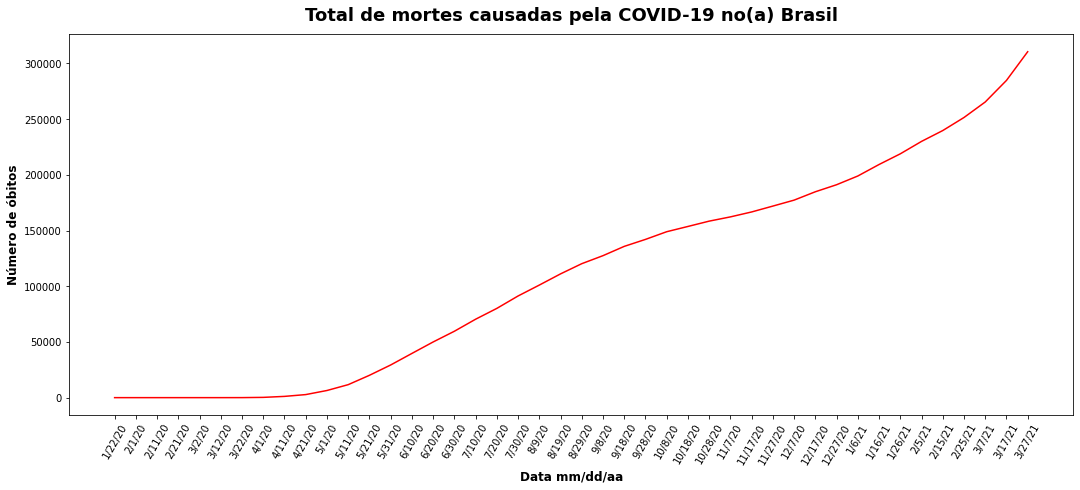

In [42]:
Grafico_de_linha(data_br, mortes_br, 'Brasil')

# **Dados dos óbitos na China**

In [43]:
mortes_china = mortes_globais.loc['China']

In [ ]:
mortes_china = mortes_china.loc[::10]

In [47]:
data_ch = mortes_china.index
mortes_ch = mortes_china.values

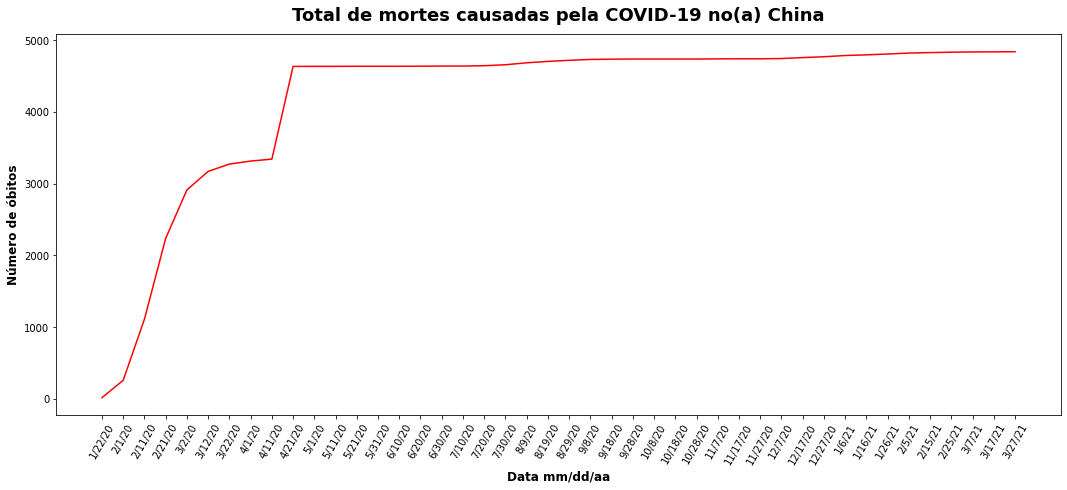

In [48]:
Grafico_de_linha(data_ch, mortes_ch, 'China')

# **Dados dos óbitos na Itália**

In [54]:
mortes_italia = mortes_globais.loc['Italy']

In [55]:
mortes_italia = mortes_italia.loc[::10]

In [56]:
data_it = mortes_italia.index
mortes_it = mortes_italia.values

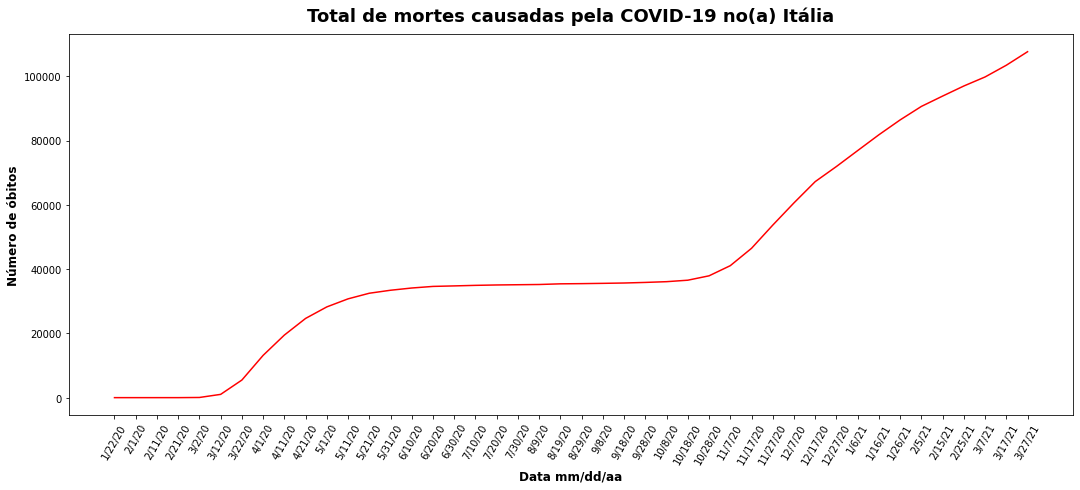

In [57]:
Grafico_de_linha(data_it, mortes_it, 'Itália')

# **Dados dos óbitos nos Estados Unidos**

In [58]:
mortes_estados_unidos = mortes_globais.loc['US']

In [59]:
mortes_estados_unidos = mortes_estados_unidos.loc[::10]

In [60]:
data_us = mortes_estados_unidos.index
mortes_us = mortes_estados_unidos.values

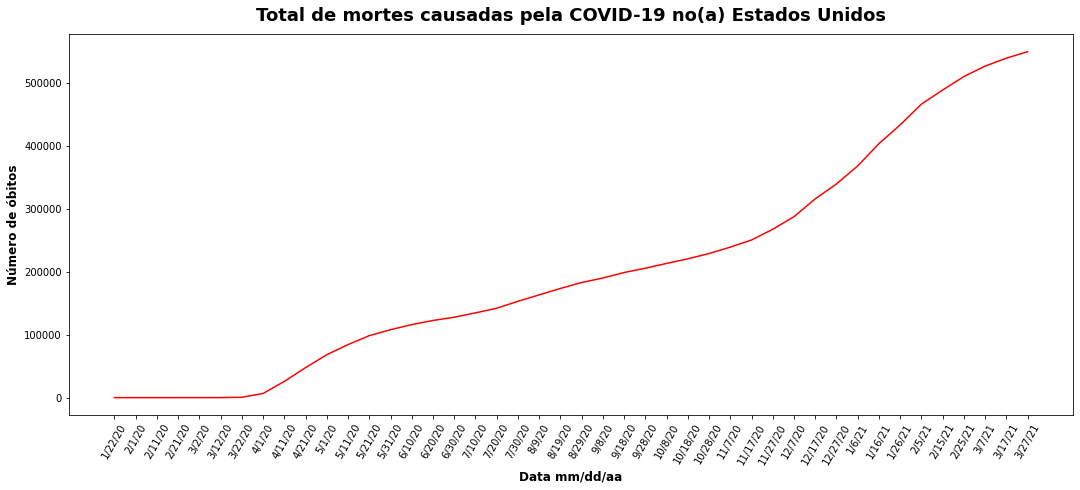

In [61]:
Grafico_de_linha(data_us, mortes_us, 'Estados Unidos')

# **Dados dos óbitos na Índia**

In [65]:
mortes_india = mortes_globais.loc['India']

In [66]:
mortes_india = mortes_india.loc[::10]

In [67]:
data_id = mortes_india.index
mortes_id = mortes_india.values

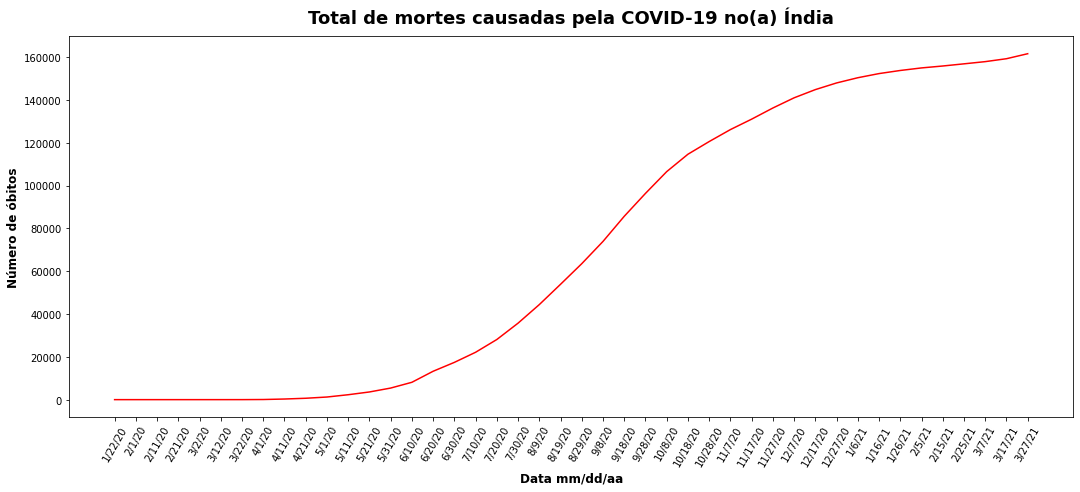

In [68]:
Grafico_de_linha(data_id, mortes_id, 'Índia')

# **Comparando o número de óbitos dos países**

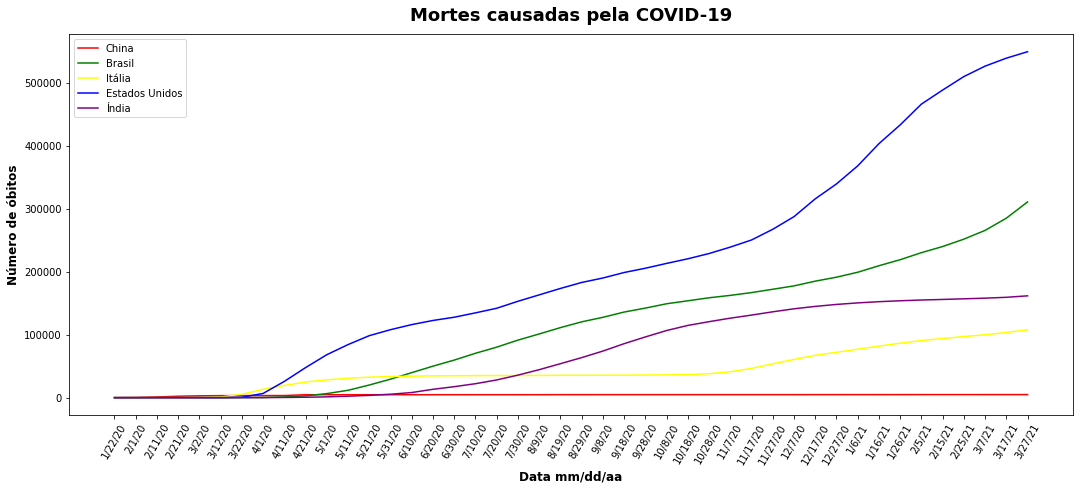

In [69]:
plt.figure(figsize = (18,7))
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation = 60)
plt.title('Mortes causadas pela COVID-19',
          position=(0.5, 1.02),
          fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.xlabel('Data mm/dd/aa',
           fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.ylabel('Número de óbitos',
           fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.plot(data_ch, mortes_ch, color = 'red')
plt.plot(mortes_br, color = 'green')
plt.plot(mortes_it, color = 'yellow')
plt.plot(mortes_us, color = 'blue')
plt.plot(mortes_id, color = 'purple')
plt.legend(['China', 'Brasil', 'Itália', 'Estados Unidos', 'Índia'])